<a href="https://colab.research.google.com/github/logeshpalanivel/Onlinefoods_Review_Classification_Using_RandomForest/blob/main/Onlinefoods_Review_Classification_Using_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("/content/onlinefoods.csv")

In [19]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [20]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [21]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [22]:
df.shape

(388, 13)

In [23]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [24]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

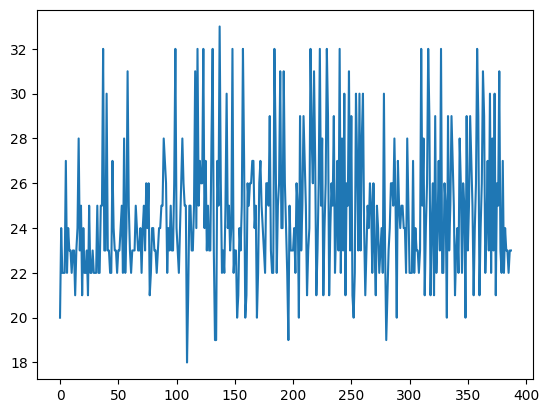

In [25]:
a=df['Age']
plt.plot(a)

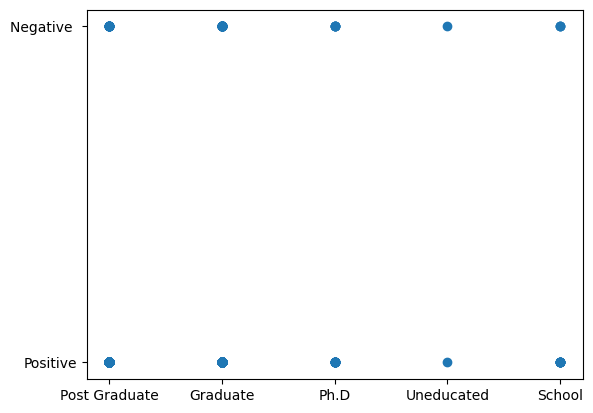

In [26]:
b=df['Educational Qualifications']
c=df['Feedback']
plt.scatter(b,c)

<BarContainer object of 388 artists>

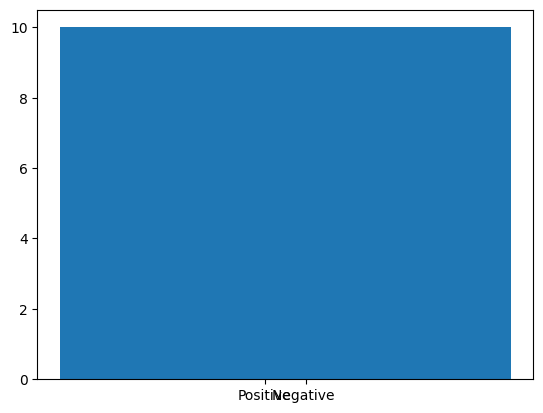

In [27]:
d=df['Feedback']
plt.bar(d,width=10,height=10)

(array([174.,   0., 177.,   0.,   0.,  23.,   0.,   2.,   0.,  12.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

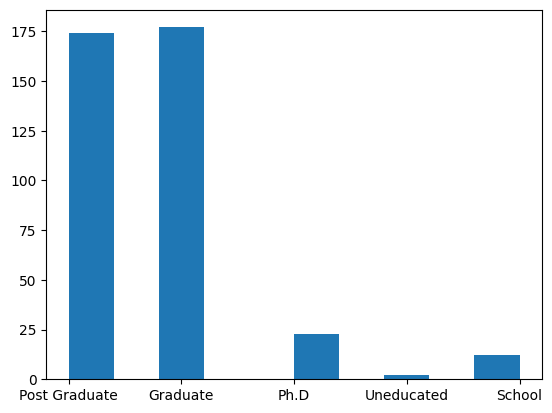

In [28]:
e=df['Educational Qualifications']
plt.hist(e)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  if df[column].dtype == 'object':
    df[column]== le.fit_transform(df[column])




In [35]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1


In [39]:
df = df.drop('Unnamed: 12',axis=1)

In [40]:
X = df.drop('Feedback',axis=1)
Y = df['Feedback']

In [41]:
X

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1
...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,1
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,1
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,1
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,1


In [42]:
Y

0      1
1      1
2      0
3      1
4      1
      ..
383    1
384    1
385    1
386    1
387    1
Name: Feedback, Length: 388, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [44]:
x_train.shape

(291, 11)

In [45]:
x_test.shape

(97, 11)

In [46]:
from sklearn.preprocessing import StandardScaler
c = StandardScaler()
x_train = c.fit_transform(x_train)
x_train

array([[-0.87420286,  0.84366149,  0.63855713, ...,  0.12609656,
        -0.19341682,  0.52565748],
       [-0.87420286,  0.84366149,  0.63855713, ...,  1.22294191,
        -0.68426823,  0.52565748],
       [-0.53770414,  0.84366149,  0.63855713, ..., -1.49506499,
         2.32628706,  0.52565748],
       ...,
       [-0.20120542,  0.84366149, -0.48762545, ..., -0.21541207,
        -1.04422592, -1.90237946],
       [-0.53770414,  0.84366149,  0.63855713, ..., -0.424335  ,
        -0.94605564,  0.52565748],
       [ 0.80829074,  0.84366149, -0.48762545, ...,  1.64681439,
        -0.71699165,  0.52565748]])

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_jobs= 1,max_depth = 5,n_estimators = 5,oob_score=True)

In [49]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=5, n_estimators=5, n_jobs=1, oob_score=True,
                       random_state=42)

In [50]:
rf

RandomForestClassifier(max_depth=5, n_estimators=5, n_jobs=1, oob_score=True,
                       random_state=42)

In [51]:
y_pred = rf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [56]:
a = accuracy_score(y_test,y_pred)
a

0.8144329896907216

In [57]:
c= confusion_matrix(y_test,y_pred)
c

array([[ 0, 18],
       [ 0, 79]])